# ÉTUDE DE SANTE PUBLIQUE FAO

## Mise en place de l'environnement de travail, importations des librairies

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Chargement des fichiers csv nécessaire à notre étude dans des dataframes grâce a la librairie pandas:          4 csv

In [5]:
df_sous_nutrition = pd.read_csv("/Users/Hamza/Downloads/DAN-P4-FAO/sous_nutrition.csv")
df_population = pd.read_csv("/Users/Hamza/Downloads/DAN-P4-FAO/population.csv")
df_dispo_alim = pd.read_csv("/Users/Hamza/Downloads/DAN-P4-FAO/dispo_alimentaire.csv")
df_aide_alim = pd.read_csv("/Users/Hamza/Downloads/DAN-P4-FAO/aide_alimentaire.csv")

## La proportion des personnes en état de sous nutrition dans le monde en 2017

### Pour déterminer une proportion, il nous faut connaitre d'abord la population mondiale totale de l'année 2017

In [6]:
# Visualisation des données du dataframe population
df_population.head(10)

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113
5,Afghanistan,2018,37171.921
6,Afrique du Sud,2013,53687.121
7,Afrique du Sud,2014,54544.186
8,Afrique du Sud,2015,55386.367
9,Afrique du Sud,2016,56207.646


#### On constate qu'il y a plusieurs fois le meme pays avec des années différentes

In [7]:
# On regarde les statistiques 
df_population.describe(include="all")

,Zone,Année,Valeur
count,1416,1416.000000,1.416000e+03
unique,236,NaN,NaN
top,Afghanistan,NaN,NaN
freq,6,NaN,NaN
mean,NaN,2015.500000,3.144793e+04
std,NaN,1.708428,1.300812e+05
min,NaN,2013.000000,7.930000e-01
25%,NaN,2014.000000,3.783410e+02
50%,NaN,2015.500000,5.126480e+03
75%,NaN,2017.000000,1.930666e+04


In [8]:
# On regarde si notre dataframe contient des valeur manquantes 
df_population.isna().sum()

Zone      0
Année     0
Valeur    0
dtype: int64

In [9]:
# On crée un masque (un filtre), qui nous renvoie un dataframe contenant les lignes correspondant aux années 2017
df_pop_année_2017 = df_population[df_population['Année'] == 2017]

df_pop_année_2017.Année.unique() # on verifie bien que notre df contient que l'année 2017

array([2017])

In [11]:
# On affiche les pays (Zone)
df_pop_année_2017.Zone.unique()

array(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Andorre', 'Angola', 'Anguilla', 'Antigua-et-Barbuda',
       'Antilles néerlandaises (ex)', 'Arabie saoudite', 'Argentine',
       'Arménie', 'Aruba', 'Australie', 'Autriche', 'Azerbaïdjan',
       'Bahamas', 'Bahreïn', 'Bangladesh', 'Barbade', 'Bélarus',
       'Belgique', 'Belize', 'Bénin', 'Bermudes', 'Bhoutan',
       'Bolivie (État plurinational de)',
       'Bonaire, Saint-Eustache et Saba', 'Bosnie-Herzégovine',
       'Botswana', 'Brésil', 'Brunéi Darussalam', 'Bulgarie',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodge', 'Cameroun',
       'Canada', 'Chili', 'Chine - RAS de Hong-Kong',
       'Chine - RAS de Macao', 'Chine, continentale',
       'Chine, Taiwan Province de', 'Chypre', 'Colombie', 'Comores',
       'Congo', 'Costa Rica', "Côte d'Ivoire", 'Croatie', 'Cuba',
       'Curaçao', 'Danemark', 'Djibouti', 'Dominique', 'Égypte',
       'El Salvador', 'Émirats arabes unis', 'Équate

#### Je ne trouve pas de redondance

In [12]:
len(df_pop_année_2017.Zone.unique())

236

#### Plus haut sur le ".describe" on voit que 1416 zones sont comptées en tout avec une fréquence de 6 pour 236 zone unique. En faisant un calcul simple 1416/6 = 236. C'est la longueur (length) que l'on retrouve dans notre dataframe donc il n'y a pas de doublons. Mais on s'en assure malgré tout ci dessous.

In [13]:
df_pop_année_2017.duplicated().sum()

0

### Maintenant, nous pouvons faire une somme de la colonne Valeur pour avoir la population mondiale en 2017

In [14]:
# On multiplie par 1000 car la colonne Valeur est comptabilisé en milliers d'habitants
population_mondiale_2017 = (df_pop_année_2017['Valeur']*1000).sum()

print('La population mondiale en 2017 est de ', population_mondiale_2017)

La population mondiale en 2017 est de  7548134111.0


### En 2017, la population mondiale s'élève à  7 548 134 111 milliards. En comparant les données avec le site des nations unies (https://www.un.org/development/desa/fr/news/population/world-population-prospects-2017.html) qui compte une population mondiale en 2017  à 7,6 milliards. C'est quasiment le meme chiffre donc les données sont cohérentes.

## Maintenant nous pouvons calculer une proportion des personnes en état de sous_nutrition en 2017.
Visualisation de différentes statistiques du dataframe "sous nutritition"

In [15]:
df_sous_nutrition.describe(include="all")

,Zone,Année,Valeur
count,1218,1218,624
unique,203,6,139
top,Afghanistan,2012-2014,<0.1
freq,6,203,120


On constate déja avec un 'describe' que nous avons 6 valeurs distinctes dans la colonne Année

In [16]:
df_sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


En affichant les données, on voit les différentes années. Nous voulons l'année 2017 qui se résume sur la moyenne des années 2016-2018.

In [17]:
# On selectionne les lignes correspondantes aux années 2016-2018 avec un masque 
df_sous_nutri_2017 = df_sous_nutrition[df_sous_nutrition['Année'] == "2016-2018"]

# On visualise le nouveau dataframe 
df_sous_nutri_2017.head(12)

,Zone,Année,Valeur
4,Afghanistan,2016-2018,10.5
10,Afrique du Sud,2016-2018,3.1
16,Albanie,2016-2018,0.1
22,Algérie,2016-2018,1.3
28,Allemagne,2016-2018,NaN
34,Andorre,2016-2018,NaN
40,Angola,2016-2018,5.8
46,Antigua-et-Barbuda,2016-2018,NaN
52,Arabie saoudite,2016-2018,1.6
58,Argentine,2016-2018,1.5


In [18]:
# On jette une oeil sur les valeurs contenues dans la Colonne 'Valeur' 

df_sous_nutri_2017['Valeur'].tolist()

['10.5',
 '3.1',
 '0.1',
 '1.3',
 nan,
 nan,
 '5.8',
 nan,
 '1.6',
 '1.5',
 '<0.1',
 nan,
 nan,
 nan,
 nan,
 nan,
 '21.5',
 '<0.1',
 nan,
 nan,
 '<0.1',
 '0.8',
 nan,
 nan,
 '1.7',
 nan,
 '0.5',
 nan,
 nan,
 '0.2',
 '3.6',
 nan,
 '<0.1',
 '2.4',
 '1.6',
 nan,
 '0.6',
 nan,
 '<0.1',
 nan,
 '0.9',
 '<0.1',
 '2.7',
 nan,
 '1.4',
 '0.2',
 '4.9',
 nan,
 nan,
 nan,
 nan,
 '<0.1',
 '4.6',
 '0.6',
 '0.3',
 '1.5',
 nan,
 nan,
 nan,
 '0.2',
 nan,
 '21.1',
 nan,
 '<0.1',
 nan,
 nan,
 '0.3',
 '0.3',
 '0.3',
 '2',
 nan,
 nan,
 nan,
 '2.7',
 nan,
 nan,
 nan,
 '<0.1',
 '5.3',
 '1.3',
 nan,
 nan,
 nan,
 '<0.1',
 '190.1',
 '23.6',
 '3.9',
 '9',
 nan,
 nan,
 nan,
 nan,
 '0.3',
 nan,
 '0.8',
 nan,
 '11.9',
 '0.4',
 '<0.1',
 nan,
 '0.8',
 nan,
 '0.4',
 '1.8',
 nan,
 nan,
 nan,
 '<0.1',
 '10.5',
 '1',
 '3.3',
 nan,
 '1',
 nan,
 '1.4',
 '<0.1',
 '0.5',
 '8.4',
 nan,
 '0.6',
 nan,
 '9.4',
 '7.3',
 '0.3',
 nan,
 '1.7',
 '1.1',
 nan,
 '22.8',
 nan,
 nan,
 '<0.1',
 nan,
 '0.4',
 nan,
 '0.9',
 '24.8',
 nan,
 nan

#### On constate qu'il y a des valeurs manquantes 'Nan' et des valeurs inferieur à '<0.1'. De plus, notre colonne est de type 'string'

In [19]:
# Je check le type de ma colonne Valeur
df_sous_nutri_2017['Valeur'].dtype

dtype('O')

Type('O') signifie que notre colonne content plusieurs type différents, remèdions à cela 

In [20]:
# Je remplace les valeurs manquante NaN par des 0
df_sous_nutri_2017 = df_sous_nutri_2017.fillna(value={'Valeur':0})
# je check
df_sous_nutri_2017['Valeur'].isna().sum()

0

In [21]:
# Je remplace les valeur de type <0.1 en 0
df_sous_nutri_2017['Valeur'] = df_sous_nutri_2017['Valeur'].replace('<0.1','0')
# je change le type en decimal
df_sous_nutri_2017['Valeur'] = df_sous_nutri_2017['Valeur'].astype('float64')
# Puis je check le type
df_sous_nutri_2017['Valeur'].dtypes

dtype('float64')

Maintenant je peux faire la somme de ma colonne Valeur

In [22]:
# Je somme, je multiplie par 1 million 

pop_sous_nutri_2017 = df_sous_nutri_2017['Valeur'].sum()
pop_sous_nutri_2017 = round(pop_sous_nutri_2017 * 1e6,2)
pop_sous_nutri_2017

535700000.0

### Le nombre de personnes en état de sous nutrition dans le monde est de 535,7 millions.

In [23]:
# On fait la proportion

proportion_sous_nutri_2017 = round(pop_sous_nutri_2017 / population_mondiale_2017 * 100,2)
print('La proportion de personnes sous nutri dans le monde en 2017  est de :', proportion_sous_nutri_2017, "%")

La proportion de personnes sous nutri dans le monde en 2017  est de : 7.1 %


### La proportion de personnes en état de sous_nutrition dans le monde représente 7,1 % de la population mondiale

## Ci-dessous, un visuel sur le monde de la sous nutrition (données extraites du sites FAO.org)

In [24]:
df_chiffre_ss_nutri = pd.read_csv("/Users/Hamza/Downloads/DAN-P4-FAO/sous_nutri_world.csv")
df_chiffre_ss_nutri = df_chiffre_ss_nutri[df_chiffre_ss_nutri['Ann?e']=='2017']
df_chiffre_ss_nutri

,Domaine,Zone,?l?ment,Produit,Ann?e,Valeur
1,Donn?es de la s?curit? alimentaire,Afrique,Valeur,Nombre de personnes sous-aliment?es (millions)...,2017,212.3
3,Donn?es de la s?curit? alimentaire,Am?rique du Nord et Europe,Valeur,Nombre de personnes sous-aliment?es (millions)...,2017,NaN
5,Donn?es de la s?curit? alimentaire,Am?rique centrale,Valeur,Nombre de personnes sous-aliment?es (millions)...,2017,13.7
7,Donn?es de la s?curit? alimentaire,Am?rique du Sud,Valeur,Nombre de personnes sous-aliment?es (millions)...,2017,22.0
9,Donn?es de la s?curit? alimentaire,Asie,Valeur,Nombre de personnes sous-aliment?es (millions)...,2017,352.1
11,Donn?es de la s?curit? alimentaire,Oc?anie,Valeur,Nombre de personnes sous-aliment?es (millions)...,2017,2.6


## ----------------------------------------------------------------------------------------------------

## 2) Le nombre théorique de personnes qui pourrait être nourries en 2017 (en terme de calories et de protéines)

Dans un 1er temps, définissons "disponibilité alimentaire" : La disponibilité alimentaire correspond à la disponibilité d'aliments en quantité suffisante et d'une qualité appropriée pour l’alimentation humaine.

Les aliments ont des qualités nutritionnels qui se mesure essentiellement par l'apport calorique mais aussi par l'apport en protéines, en matieres grasses...

Selon la FAO (https://www.fao.org/3/y5740f/y5740f0f.htm#TopOfPage), un être humain, homme-femme-enfant confondu à besoin en moyenne de <b>2500 calories/jours</b> (soit 912500 calories /an) . Un autre besoin en nutriment est l'apport en protéines, en moyenne un être humain de 10 à 60 ans doit en consommer <b>50 grammes/jour</b> (soit 18250 g de protéines/an). Ces données nous serviront pour les calculs dans cette étude.

------------------------------------------------------------------------------------------------------------------------------------------------

In [25]:
# J'affiche les statistiques 
df_dispo_alim.describe(include="all")

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
count,15605,15605,15605,2720.000000,5496.000000,14241.000000,14015.000000,11794.000000,11561.000000,15382.000000,12226.000000,14852.000000,14015.000000,4278.000000,9180.000000,2091.000000,2292.000000,6776.000000
unique,174,98,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Inde,Abats Comestible,vegetale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,97,174,11896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,479.501838,157.391376,34.789832,8.719368,1.283111,1.223608,640.293460,110.596925,87.264543,347.931359,106.053763,1090.379085,73.974653,961.905323,-15.407615
std,NaN,NaN,NaN,4240.119637,5076.785816,107.287655,24.618223,3.680399,3.598686,9067.267153,1053.318990,717.372714,4475.704458,1113.100416,12067.344094,528.069224,10381.795904,549.834540
min,NaN,NaN,NaN,0.000000,0.000000,-21.000000,-1.930000,-0.030000,-0.370000,-3430.000000,-41.000000,-201.000000,-246.000000,0.000000,0.000000,0.000000,-19.000000,-39863.000000
25%,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.060000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,4.000000,0.000000,4.000000,0.830000,0.080000,0.100000,7.000000,0.000000,2.000000,5.000000,4.000000,22.000000,2.000000,6.000000,0.000000
75%,NaN,NaN,NaN,74.000000,4.000000,21.000000,5.190000,0.630000,0.660000,76.750000,9.000000,18.000000,52.000000,26.000000,191.250000,17.000000,69.000000,0.000000


In [26]:
df_dispo_alim.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


#### Pour connaitre la disponibilté alimentaire en Calories, il faut d'abord pondérer la quantité de calories disponible par la population du pays respectif

In [27]:
# Création d'un dataframe ou on joint le df_dispo_alim avec df_population
join_dispo_pop = df_dispo_alim.join(df_pop_année_2017.set_index('Zone'), on='Zone')
join_dispo_pop.head(20)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Valeur
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN,2017.0,36296.113
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN,2017.0,36296.113
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,2017.0,36296.113
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2017.0,36296.113
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN,2017.0,36296.113
5,Afghanistan,"Beurre, Ghee",animale,NaN,NaN,23.0,1.17,2.61,0.03,36.0,NaN,0.0,36.0,NaN,36.0,NaN,NaN,NaN,2017.0,36296.113
6,Afghanistan,Bière,vegetale,NaN,NaN,0.0,0.09,NaN,0.00,3.0,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,2017.0,36296.113
7,Afghanistan,Blé,vegetale,NaN,NaN,1369.0,160.23,4.69,36.91,5992.0,NaN,1173.0,4895.0,775.0,5169.0,322.0,NaN,-350.0,2017.0,36296.113
8,Afghanistan,Boissons Alcooliques,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2017.0,36296.113
9,Afghanistan,Café,vegetale,NaN,NaN,0.0,0.00,NaN,0.00,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2017.0,36296.113


In [28]:
# Je regarde s'il y des valeurs manquantes
join_dispo_pop.isna().sum()

Zone                                                                 0
Produit                                                              0
Origine                                                              0
Aliments pour animaux                                            12885
Autres Utilisations                                              10109
Disponibilité alimentaire (Kcal/personne/jour)                    1364
Disponibilité alimentaire en quantité (kg/personne/an)            1590
Disponibilité de matière grasse en quantité (g/personne/jour)     3811
Disponibilité de protéines en quantité (g/personne/jour)          4044
Disponibilité intérieure                                           223
Exportations - Quantité                                           3379
Importations - Quantité                                            753
Nourriture                                                        1590
Pertes                                                           11327
Produc

In [29]:
# On remplace les valeurs manquantes par 0 pour les colonnes concernées
join_dispo_pop.fillna(value={'Disponibilité alimentaire (Kcal/personne/jour)': 0}, inplace=True)
join_dispo_pop.fillna(value={'Disponibilité de protéines en quantité (g/personne/jour)': 0}, inplace=True)

join_dispo_pop.head(10)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Valeur
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN,2017.0,36296.113
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN,2017.0,36296.113
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,2017.0,36296.113
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,0.00,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2017.0,36296.113
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN,2017.0,36296.113
5,Afghanistan,"Beurre, Ghee",animale,NaN,NaN,23.0,1.17,2.61,0.03,36.0,NaN,0.0,36.0,NaN,36.0,NaN,NaN,NaN,2017.0,36296.113
6,Afghanistan,Bière,vegetale,NaN,NaN,0.0,0.09,NaN,0.00,3.0,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,2017.0,36296.113
7,Afghanistan,Blé,vegetale,NaN,NaN,1369.0,160.23,4.69,36.91,5992.0,NaN,1173.0,4895.0,775.0,5169.0,322.0,NaN,-350.0,2017.0,36296.113
8,Afghanistan,Boissons Alcooliques,vegetale,NaN,NaN,0.0,0.00,NaN,0.00,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2017.0,36296.113
9,Afghanistan,Café,vegetale,NaN,NaN,0.0,0.00,NaN,0.00,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2017.0,36296.113


On constate que les valeurs manquantes ont été remplacé par des zéros dans les colonnes concernées.

In [30]:
# Ajout de 2 colonnes totalCal et totalProt, où on multiplie les calories et les protéines par la population du pays

join_dispo_pop['totalCal'] = join_dispo_pop['Disponibilité alimentaire (Kcal/personne/jour)'] * join_dispo_pop['Valeur'] * 1000 * 365

join_dispo_pop['totalProt'] = join_dispo_pop['Disponibilité de protéines en quantité (g/personne/jour)'] * join_dispo_pop['Valeur'] * 1000 * 365
    

In [31]:
join_dispo_pop.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Valeur,totalCal,totalProt
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,...,53.0,NaN,53.0,NaN,NaN,NaN,2017.0,36296.113,6.624041e+10,1.020102e+10
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,...,39.0,2.0,3.0,NaN,NaN,NaN,2017.0,36296.113,1.324808e+10,2.649616e+08
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,...,2.0,NaN,NaN,NaN,NaN,NaN,2017.0,36296.113,1.324808e+10,3.974424e+08
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,0.00,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,2017.0,36296.113,0.000000e+00,0.000000e+00
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,...,82.0,NaN,NaN,NaN,NaN,NaN,2017.0,36296.113,5.299232e+10,6.624041e+08


In [32]:
# Je verifie si j'ai des valeurs manquantes dans mes colonnes ajoutées

join_dispo_pop[['totalCal','totalProt']].isna().sum()

totalCal     189
totalProt    189
dtype: int64

In [33]:
# Je met mes valeurs manquantes à 0 et je check

join_dispo_pop.fillna(value={'totalCal':0,'totalProt':0}, inplace=True)
join_dispo_pop[['totalCal','totalProt']].isna().sum()

totalCal     0
totalProt    0
dtype: int64

In [34]:
#Création d'un dataframe avec les les colonnes nécessaires 

df_dispo = join_dispo_pop[['Zone','totalCal','totalProt']]
df_dispo.head()

,Zone,totalCal,totalProt
0,Afghanistan,6.624041e+10,1.020102e+10
1,Afghanistan,1.324808e+10,2.649616e+08
2,Afghanistan,1.324808e+10,3.974424e+08
3,Afghanistan,0.000000e+00,0.000000e+00
4,Afghanistan,5.299232e+10,6.624041e+08


In [35]:
df_dispo.dtypes

Zone          object
totalCal     float64
totalProt    float64
dtype: object

In [36]:
# Je crée un tableau croisé pour avoir mes 2 colonnes en fonction des zones

df_total = df_dispo.pivot_table(['totalCal','totalProt'], index= 'Zone', aggfunc = sum)
df_total

,totalCal,totalProt
Zone,,
Afghanistan,2.764875e+13,7.718332e+11
Afrique du Sud,6.284185e+13,1.775595e+12
Albanie,3.356077e+12,1.172416e+11
Algérie,4.974753e+13,1.388640e+12
Allemagne,1.056866e+14,3.058969e+12
...,...,...
Émirats arabes unis,1.134077e+13,3.619003e+11
Équateur,1.437314e+13,3.755641e+11
États-Unis d'Amérique,4.368912e+14,1.298333e+13


In [37]:
# Somme de la colonne total_Calorie et totalProt divisé par le besoin nutritionnel en calorie sur 1 an (912500) et 
# le besoin nutritionnel en protéines sur 1 an (18250).

nb_theorik_nourris_cal = round(df_total['totalCal'].sum()/(912500))
nb_theorik_nourris_prot = round(df_total['totalProt'].sum()/ 18250)
nb_theorik_nourris_cal, nb_theorik_nourris_prot

(8367593851, 11741273473)

### Plus de 8,36 milliards de personnes pourraient être nourri par la disponibilité alimentaire en calories

### Et plus de 11,74 milliards de personnes pourraient être nourri par la dispo alimentaire en protéines

## -------------------------------------------------------------------------------------------------------

## 3) Le nombre théorique de personnes qui pourrait être nourris en terme de calorie par les produits végétaux uniquement.

In [38]:
# je crée un dataframe pour afficher seulement les lignes dont l'origine est végétale

df_dispo_vege = join_dispo_pop.where(join_dispo_pop["Origine"] == "vegetale")
df_dispo_vege.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Valeur,totalCal,totalProt
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,...,39.0,2.0,3.0,NaN,NaN,NaN,2017.0,36296.113,1.324808e+10,2.649616e+08
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,...,2.0,NaN,NaN,NaN,NaN,NaN,2017.0,36296.113,1.324808e+10,3.974424e+08
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,0.00,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,2017.0,36296.113,0.000000e+00,0.000000e+00
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,...,82.0,NaN,NaN,NaN,NaN,NaN,2017.0,36296.113,5.299232e+10,6.624041e+08


In [39]:
# J'ajoute une colonne totalVege pour le calcul du nombre de calories en produit vegetaux, par la population du pays

df_dispo_vege['totalVege'] = df_dispo_vege['Disponibilité alimentaire (Kcal/personne/jour)'] * df_dispo_vege['Valeur'] * 1000 * 365
df_dispo_vege.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Pertes,Production,Semences,Traitement,Variation de stock,Année,Valeur,totalCal,totalProt,totalVege
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,...,2.0,3.0,NaN,NaN,NaN,2017.0,36296.113,1.324808e+10,2.649616e+08,1.324808e+10
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,...,NaN,NaN,NaN,NaN,NaN,2017.0,36296.113,1.324808e+10,3.974424e+08,1.324808e+10
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,2017.0,36296.113,0.000000e+00,0.000000e+00,0.000000e+00
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,...,NaN,NaN,NaN,NaN,NaN,2017.0,36296.113,5.299232e+10,6.624041e+08,5.299232e+10


In [40]:
df_dispo_vege['totalVege'].isna().sum()

3854

In [41]:
df_dispo_vege.fillna(value={'totalVege': 0}, inplace=True)
df_dispo_vege['totalVege'].isna().sum()

0

In [42]:
df_dispo_vege.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Pertes,Production,Semences,Traitement,Variation de stock,Année,Valeur,totalCal,totalProt,totalVege
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,...,2.0,3.0,NaN,NaN,NaN,2017.0,36296.113,1.324808e+10,2.649616e+08,1.324808e+10
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,...,NaN,NaN,NaN,NaN,NaN,2017.0,36296.113,1.324808e+10,3.974424e+08,1.324808e+10
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,2017.0,36296.113,0.000000e+00,0.000000e+00,0.000000e+00
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,...,NaN,NaN,NaN,NaN,NaN,2017.0,36296.113,5.299232e+10,6.624041e+08,5.299232e+10


In [43]:
# On fait un tableau croisé pour agreger notre colonne vege en fonction des zones
df_dispo_vege.pivot_table('totalVege', index= 'Zone', aggfunc=sum)

,totalVege
Zone,
Afghanistan,2.478716e+13
Afrique du Sud,5.270808e+13
Albanie,2.319146e+12
Algérie,4.403706e+13
Allemagne,7.424916e+13
...,...
Émirats arabes unis,9.411969e+12
Équateur,1.061137e+13
États-Unis d'Amérique,3.201337e+14


In [44]:
# On somme la colonne vege divisé par le besoin calorique sur 1 an
nb_theorik_nourris_vege = round(df_dispo_vege['totalVege'].sum()/ 912500)
nb_theorik_nourris_vege

6904305685

### 6,9 milliards de personnes pourrait être nourri en terme de calories par les seuls produits végétaux

## -------------------------------------------------------------------------------------------------------

## 4) L'utilisation de la disponibilité intérieur : la part utilisé pour l'alimentation animale, la part qui est perdue et la part pour l'alimentation humaine

In [45]:
# Affichons le dataframe pour voir nos données
df_dispo_alim.head(10)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN
5,Afghanistan,"Beurre, Ghee",animale,NaN,NaN,23.0,1.17,2.61,0.03,36.0,NaN,0.0,36.0,NaN,36.0,NaN,NaN,NaN
6,Afghanistan,Bière,vegetale,NaN,NaN,0.0,0.09,NaN,0.00,3.0,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN
7,Afghanistan,Blé,vegetale,NaN,NaN,1369.0,160.23,4.69,36.91,5992.0,NaN,1173.0,4895.0,775.0,5169.0,322.0,NaN,-350.0
8,Afghanistan,Boissons Alcooliques,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
9,Afghanistan,Café,vegetale,NaN,NaN,0.0,0.00,NaN,0.00,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN


#### La "Disponibilité interieure"  comme nous en a parlé Julien dans le lexique des données à un lien logique avec les autres colonnes de ce tableau. Ce lien se traduit par une simple équation que voici : (A1 + A2 ... = Disponibilité intérieure = B1 + B2 ...)

Production + Importation - Exportation + Varations de stock = <b>Disponibilité intérieure</b> = nourriture + aliments pour animaux + pertes + Semences + Traitement + Autres Utilisations.

In [46]:
df_dispo_alim[['Aliments pour animaux','Disponibilité intérieure', 'Pertes', 'Nourriture','Semences', 'Traitement','Production','Importations - Quantité','Exportations - Quantité','Autres Utilisations','Variation de stock']].isna().sum()

Aliments pour animaux       12885
Disponibilité intérieure      223
Pertes                      11327
Nourriture                   1590
Semences                    13514
Traitement                  13313
Production                   6425
Importations - Quantité       753
Exportations - Quantité      3379
Autres Utilisations         10109
Variation de stock           8829
dtype: int64

In [47]:
# Je regarde le type de mes colonnes
df_dispo_alim[['Aliments pour animaux','Disponibilité intérieure', 'Pertes', 'Nourriture','Semences', 'Traitement','Production','Importations - Quantité','Exportations - Quantité','Autres Utilisations','Variation de stock']].dtypes

Aliments pour animaux       float64
Disponibilité intérieure    float64
Pertes                      float64
Nourriture                  float64
Semences                    float64
Traitement                  float64
Production                  float64
Importations - Quantité     float64
Exportations - Quantité     float64
Autres Utilisations         float64
Variation de stock          float64
dtype: object

In [48]:
# remplacement des valeurs manquantes
df_disp = df_dispo_alim.fillna(value={'Aliments pour animaux': 0, 'Disponibilité intérieure': 0, 'Pertes':0, 'Nourriture':0,'Semences':0,'Traitement':0,'Production':0,'Importations - Quantité':0,'Exportations - Quantité':0,'Autres Utilisations':0,'Variation de stock':0})
# je check mes valeurs manquantes a nouveau
df_disp[['Aliments pour animaux','Disponibilité intérieure', 'Pertes','Nourriture','Semences', 'Traitement','Production','Importations - Quantité','Exportations - Quantité','Autres Utilisations','Variation de stock']].isna().sum()

Aliments pour animaux       0
Disponibilité intérieure    0
Pertes                      0
Nourriture                  0
Semences                    0
Traitement                  0
Production                  0
Importations - Quantité     0
Exportations - Quantité     0
Autres Utilisations         0
Variation de stock          0
dtype: int64

Maintenant, je creer un tableau croisé pour avoir les sommes de mes colonnes par pays. 

In [49]:
df_proportion_inter = df_disp.pivot_table(['Aliments pour animaux','Disponibilité intérieure', 'Pertes','Nourriture','Semences', 'Traitement','Production','Importations - Quantité','Exportations - Quantité','Autres Utilisations','Variation de stock'], index= 'Zone', aggfunc = sum)
df_proportion_inter

,Aliments pour animaux,Autres Utilisations,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,
Afghanistan,768.0,415.0,13515.0,278.0,2988.0,10735.0,1135.0,11171.0,395.0,63.0,-368.0
Afrique du Sud,5309.0,876.0,61256.0,11674.0,7517.0,29812.0,2193.0,63263.0,253.0,22819.0,2153.0
Albanie,660.0,174.0,4758.0,94.0,933.0,3476.0,276.0,3964.0,55.0,113.0,-45.0
Algérie,4352.0,1707.0,42630.0,655.0,17403.0,31729.0,3753.0,26359.0,449.0,637.0,-479.0
Allemagne,30209.0,7711.0,162275.0,57431.0,65353.0,79238.0,3781.0,154547.0,1551.0,39842.0,-192.0
...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,1174.0,2689.0,11850.0,4343.0,15327.0,6548.0,705.0,1192.0,3.0,804.0,-327.0
Équateur,1200.0,1909.0,18614.0,8002.0,1725.0,8574.0,707.0,24337.0,138.0,6200.0,557.0
États-Unis d'Amérique,148432.0,154699.0,777992.0,163524.0,81887.0,320889.0,7162.0,894668.0,10403.0,141010.0,-35032.0


Maintenant, j'additionne les valeurs de mes colonnes pour pouvoir les comparé à la somme de la colonne 'disponibilité intérieure' et ainsi faire des proportions.

In [50]:
dispo_animaux = df_proportion_inter['Aliments pour animaux'].sum() * 1000
dispo_inter = df_proportion_inter['Disponibilité intérieure'].sum() * 1000
dispo_pertes = df_proportion_inter['Pertes'].sum() * 1000
dispo_humaine = df_proportion_inter['Nourriture'].sum() * 1000
dispo_semences = df_proportion_inter['Semences'].sum() * 1000
dispo_traitement = df_proportion_inter['Traitement'].sum() * 1000
dispo_prod = df_proportion_inter['Production'].sum() * 1000
dispo_autres_util = df_proportion_inter['Autres Utilisations'].sum() * 1000
dispo_export = df_proportion_inter['Exportations - Quantité'].sum() * 1000
dispo_import = df_proportion_inter['Importations - Quantité'].sum() * 1000
dispo_variation = df_proportion_inter['Variation de stock'].sum() * 1000

dispo_animaux, dispo_inter, dispo_pertes, dispo_humaine, dispo_semences, dispo_traitement, dispo_prod, dispo_autres_util, dispo_export, dispo_import, dispo_variation

(1304245000.0,
 9848994000.0,
 453698000.0,
 4876258000.0,
 154681000.0,
 2204687000.0,
 10009680000.0,
 865023000.0,
 1352158000.0,
 1296053000.0,
 -104402000.0)

In [51]:
prop_animaux = round((dispo_animaux/dispo_inter) * 100,2)
prop_pertes = round((dispo_pertes/dispo_inter) * 100,2)
prop_humaine = round((dispo_humaine/dispo_inter) * 100,2)
prop_semences = round((dispo_semences/dispo_inter) * 100,2)
prop_traitement = round((dispo_traitement/dispo_inter) * 100,2)
prop_prod = round((dispo_prod/dispo_inter) * 100,2)
prop_autres_util = round((dispo_autres_util/dispo_inter) * 100,2)
prop_export = round((dispo_export/dispo_inter) * 100,2)
prop_import = round((dispo_import/dispo_inter) * 100,2)
prop_variation = round((dispo_variation/dispo_inter) * 100,2)

prop_animaux, prop_pertes, prop_humaine, prop_semences, prop_traitement, prop_prod, prop_autres_util, prop_export, prop_import, prop_variation

(13.24, 4.61, 49.51, 1.57, 22.38, 101.63, 8.78, 13.73, 13.16, -1.06)

## La part de disponibilité intérieure utilisé pour l'alimentation animale est de 13,24 %

## Celle qui est perdue est de 4,61 %

## Et la part utilisé pour l'alimentation humaine est de 49,51 %

### Représentation graphique de toute la disponibilité intérieure par les utilisations qui en sont faites.

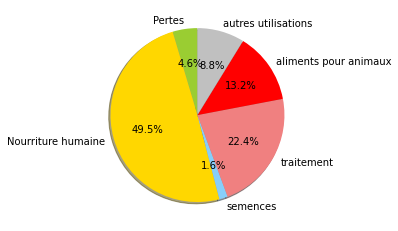

In [52]:
données = np.array([prop_pertes,prop_humaine,prop_semences,prop_traitement,prop_animaux,prop_autres_util])
labels = ['Pertes','Nourriture humaine','semences','traitement', 'aliments pour animaux', 'autres utilisations']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','red','silver']


plt.pie(données, labels=labels, colors=colors, autopct='%1.1f%%',shadow=True, startangle=90)
plt.show()

## ----------------------------------------------------------------------------------------------------

## Pays pour lesquels la proportion de personnes en état de sous_nutrition est la plus forte en 2017

In [53]:
# visualisation du dataframe créér précédement a partir du df_sous_nutrition filtrer sur l'année 2017 et nettoyé
df_sous_nutri_2017['Année']= df_sous_nutri_2017['Année'].replace('2016-2018','2017')
df_sous_nutri_2017.dtypes

Zone       object
Année      object
Valeur    float64
dtype: object

In [54]:
df_pop_année_2017.dtypes

Zone       object
Année       int64
Valeur    float64
dtype: object

In [55]:
df_sous_nutri_2017['Année'] = df_sous_nutri_2017['Année'].astype('int64')
df_sous_nutri_2017.dtypes

Zone       object
Année       int64
Valeur    float64
dtype: object

In [97]:
df_nutri_pop = df_sous_nutri_2017.merge(df_pop_année_2017, on=['Zone','Année'], how='left')
df_nutri_pop['Valeur_y'] = df_nutri_pop['Valeur_y'] *1000   # population en sous_nutrition
df_nutri_pop['Valeur_x'] = df_nutri_pop['Valeur_x'] *1e6    # population
df_nutri_pop['proportion population en sous nutrition (%)'] = round(df_nutri_pop['Valeur_x'] / df_nutri_pop['Valeur_y'] * 100,2) 
df_nutri_pop.sort_values(by='proportion population en sous nutrition (%)', ascending=False).head(60)


,Zone,Année,Valeur_x,Valeur_y,proportion population en sous nutrition (%)
78,Haïti,2017,5300000.0,1.098237e+07,48.26
157,République populaire démocratique de Corée,2017,12000000.0,2.542982e+07,47.19
108,Madagascar,2017,10500000.0,2.557051e+07,41.06
103,Libéria,2017,1800000.0,4.702226e+06,38.28
100,Lesotho,2017,800000.0,2.091534e+06,38.25
183,Tchad,2017,5700000.0,1.501675e+07,37.96
161,Rwanda,2017,4200000.0,1.198096e+07,35.06
121,Mozambique,2017,9400000.0,2.864902e+07,32.81
186,Timor-Leste,2017,400000.0,1.243258e+06,32.17
0,Afghanistan,2017,10500000.0,3.629611e+07,28.93


## Le pays le plus touché par la sous nutrition en proportion de sa population en 2017 est Haïti avec quasiment 50%, suivi de près par la Corée du Nord, Le Madagascar.....

## -------------------------------------------------------------------------------------------------

## Les pays qui ont le plus bénéficié d'aide depuis 2013

In [53]:
df_aide_alim.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [54]:
df_aide_alim.describe(include='all')

,Pays bénéficiaire,Année,Produit,Valeur
count,1475,1475.000000,1475,1475.000000
unique,76,NaN,16,NaN
top,Algérie,NaN,Non-céréales,NaN
freq,39,NaN,220,NaN
mean,NaN,2014.054237,NaN,7481.966780
std,NaN,0.946916,NaN,23339.531424
min,NaN,2013.000000,NaN,0.000000
25%,NaN,2013.000000,NaN,287.500000
50%,NaN,2014.000000,NaN,1178.000000
75%,NaN,2015.000000,NaN,4334.500000


In [55]:
# je renomme une colonne pas souci d'efficacité
df_aide = df_aide_alim.rename(columns={'Pays bénéficiaire':'Pays'})
df_aide.head()

,Pays,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [56]:
df_aide['Pays'].unique()  

array(['Afghanistan', 'Algérie', 'Angola', 'Bangladesh', 'Bénin',
       'Bhoutan', 'Bolivie (État plurinational de)', 'Burkina Faso',
       'Burundi', 'Cambodge', 'Cameroun', 'Chine, continentale',
       'Colombie', 'Comores', 'Congo', "Côte d'Ivoire", 'Cuba',
       'Djibouti', 'Égypte', 'El Salvador', 'Équateur', 'Éthiopie',
       'Gambie', 'Géorgie', 'Ghana', 'Guatemala', 'Guinée',
       'Guinée-Bissau', 'Haïti', 'Honduras',
       "Iran (République islamique d')", 'Iraq', 'Jordanie', 'Kenya',
       'Kirghizistan', 'Lesotho', 'Liban', 'Libéria', 'Libye',
       'Madagascar', 'Malawi', 'Mali', 'Mauritanie', 'Mozambique',
       'Myanmar', 'Népal', 'Nicaragua', 'Niger', 'Ouganda', 'Pakistan',
       'Palestine', 'Philippines', 'République arabe syrienne',
       'République centrafricaine', 'République démocratique du Congo',
       'République démocratique populaire lao', 'République dominicaine',
       'République populaire démocratique de Corée',
       'République-Unie de T

In [57]:
# je regarde le nombre distinct d'années
df_aide['Année'].unique()

array([2013, 2014, 2015, 2016])

In [58]:
df_aide['Valeur'].isna().sum()

0

In [59]:
df_aide['Valeur'].dtype

dtype('int64')

In [60]:
# tableau croisé sur les valeurs en fonction du pays et de l'année
df1 = df_aide.pivot_table('Valeur', 'Pays', 'Année', aggfunc=sum)
df1.head()

Année,2013,2014,2015,2016
Pays,,,,
Afghanistan,128238.0,57214.0,NaN,NaN
Algérie,35234.0,18980.0,17424.0,9476.0
Angola,5000.0,14.0,NaN,NaN
Bangladesh,131018.0,194628.0,22542.0,NaN
Bhoutan,1724.0,146.0,578.0,218.0


In [61]:
df1['totalAide'] = df1.sum(axis=1, skipna=True)
df1 = df1.sort_values(by='totalAide', ascending=False)
df2 = pd.DataFrame(df1.iloc[:,4])

In [64]:
df2

,totalAide
Pays,
République arabe syrienne,1858943.0
Éthiopie,1381294.0
Yémen,1206484.0
Soudan du Sud,695248.0
Soudan,669784.0
...,...
Égypte,1122.0
Vanuatu,802.0
Timor-Leste,116.0


## Les pays ayant touché le plus d'aide alimentaire depuis 2013 sont la Syrie, l'Ethiopie, Yémen, Soudan du Sud...

## ---------------------------------------------------------------------------------------------------

## Les pays ayant le plus et le moins de disponibilité alimentaire par habitant

In [65]:
join_dispo_pop

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Valeur,totalCal,totalProt
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,...,53.0,NaN,53.0,NaN,NaN,NaN,2017.0,36296.113,6.624041e+10,1.020102e+10
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,...,39.0,2.0,3.0,NaN,NaN,NaN,2017.0,36296.113,1.324808e+10,2.649616e+08
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,...,2.0,NaN,NaN,NaN,NaN,NaN,2017.0,36296.113,1.324808e+10,3.974424e+08
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,0.00,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,2017.0,36296.113,0.000000e+00,0.000000e+00
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,...,82.0,NaN,NaN,NaN,NaN,NaN,2017.0,36296.113,5.299232e+10,6.624041e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,NaN,NaN,45.0,4.70,4.28,1.41,3.0,...,3.0,NaN,2.0,NaN,NaN,NaN,2017.0,636.039,1.044694e+10,3.273375e+08
15601,Îles Salomon,Viande de Volailles,animale,NaN,NaN,11.0,3.34,0.69,1.14,2.0,...,2.0,NaN,0.0,NaN,NaN,NaN,2017.0,636.039,2.553697e+09,2.646558e+08
15602,Îles Salomon,"Viande, Autre",animale,NaN,NaN,0.0,0.06,NaN,0.04,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,2017.0,636.039,0.000000e+00,9.286169e+06
15603,Îles Salomon,Vin,vegetale,NaN,NaN,0.0,0.07,NaN,0.00,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,2017.0,636.039,0.000000e+00,0.000000e+00


In [66]:
df_plus_ou_moins = join_dispo_pop[['Disponibilité alimentaire (Kcal/personne/jour)','Zone']]
df_plus_ou_moins = df_plus_ou_moins.pivot_table(['Disponibilité alimentaire (Kcal/personne/jour)'], index='Zone', aggfunc=sum)
df_plus_ou_moins.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)', ascending=False)

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
Autriche,3770.0
Belgique,3737.0
Turquie,3708.0
États-Unis d'Amérique,3682.0
Israël,3610.0
...,...
Haïti,2089.0
Afghanistan,2087.0
Madagascar,2056.0


## L'autriche est les pays qui a le plus de disponibilité alimentaire par habitant en calories et la République centrafricaine tient la dernière place de ce classement.

## --------------------------------------------------------------------------------------------------

# Exploration complémentaire

## Ratio production-exportation de  Manioc (Thailande)

In [67]:
df_thai = pd.read_csv("/Users/Hamza/Downloads/DAN-P4-FAO/Manioc.csv")

In [68]:
df_thai

,Domaine,Zone,Élément,Produit,Année,Valeur
0,Bilans Alimentaires (2010-),Thaïlande,Production,Manioc et produits,2017,30495
1,Bilans Alimentaires (2010-),Thaïlande,Importations - Quantité,Manioc et produits,2017,2355
2,Bilans Alimentaires (2010-),Thaïlande,Exportations - Quantité,Manioc et produits,2017,29409


In [69]:
pivot_thai = df_thai.pivot_table('Valeur', columns = 'Élément', aggfunc=sum)
pivot_thai

Élément,Exportations - Quantité,Importations - Quantité,Production
Valeur,29409,2355,30495


In [70]:
ratio = round(pivot_thai['Exportations - Quantité'] / pivot_thai['Production'] * 100,2)
ratio

Valeur    96.44
dtype: float64

### 96,44 % du Manioc produit en Thailande est exporté

### Alors que le pays souffre de mal nutrition a hauteur de 8,96 %

In [71]:
sous_nutri_thai = df_sous_nutri_2017[df_sous_nutri_2017['Zone']== 'Thaïlande']
sous_nutri_thai

,Zone,Année,Valeur
1114,Thaïlande,2017,6.2


In [72]:
df_pop_thai = df_pop_année_2017[df_pop_année_2017['Zone']== 'Thaïlande']
df_pop_thai

,Zone,Année,Valeur
1312,Thaïlande,2017,69209.81


In [73]:
df_proportion = df_pop_thai.merge(sous_nutri_thai, on='Zone')
df_proportion['Valeur_x'] *= 1000
df_proportion['Valeur_y'] *= 1e6
df_proportion

,Zone,Année_x,Valeur_x,Année_y,Valeur_y
0,Thaïlande,2017,69209810.0,2017,6200000.0


In [74]:
proportion_thai_sous_nutri = round(df_proportion['Valeur_y'] / df_proportion['Valeur_x']* 100,2)
proportion_thai_sous_nutri

0    8.96
dtype: float64

## ---------------------------------------------------------------------------------------------------

# FIN DE L'ETUDE